In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [2]:
def data_seq_gen(x_size, y_size, arr):
    x = []
    y = []
    for i in range (0,len(arr)-x_size-y_size+1):
        x.append(arr[i:i+x_size])
        y.append(arr[i+x_size:i+x_size+y_size])
    return (x,y)

In [3]:
df = pd.read_csv("AirPassengers.csv")["#Passengers"]

In [4]:
train_df = df.values[0:int(len(df)*0.7)]
test_df = df.values[int(len(df)*0.7):]

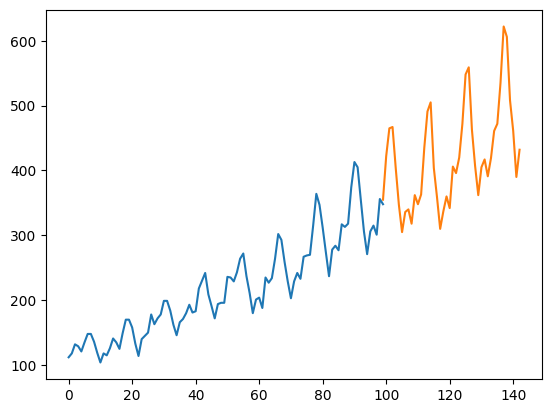

In [5]:
plt.plot([ind for ind, val in enumerate(train_df) ], train_df)
plt.plot([len(train_df)-1+ind for ind, val in enumerate(test_df) ], test_df)

In [6]:
prev_rec = 5
tr_x,tr_y = data_seq_gen(prev_rec,1,train_df)
ts_x ,ts_y = data_seq_gen(prev_rec,1,test_df)

In [7]:
tr_X, tr_Y = np.array(tr_x), np.array(tr_y)
ts_X, ts_Y = np.array(ts_x), np.array(ts_y)

In [8]:
for p,q in zip (ts_X, ts_Y): 
    print (p, "-->", q)

[355 422 465 467 404] --> [347]
[422 465 467 404 347] --> [305]
[465 467 404 347 305] --> [336]
[467 404 347 305 336] --> [340]
[404 347 305 336 340] --> [318]
[347 305 336 340 318] --> [362]
[305 336 340 318 362] --> [348]
[336 340 318 362 348] --> [363]
[340 318 362 348 363] --> [435]
[318 362 348 363 435] --> [491]
[362 348 363 435 491] --> [505]
[348 363 435 491 505] --> [404]
[363 435 491 505 404] --> [359]
[435 491 505 404 359] --> [310]
[491 505 404 359 310] --> [337]
[505 404 359 310 337] --> [360]
[404 359 310 337 360] --> [342]
[359 310 337 360 342] --> [406]
[310 337 360 342 406] --> [396]
[337 360 342 406 396] --> [420]
[360 342 406 396 420] --> [472]
[342 406 396 420 472] --> [548]
[406 396 420 472 548] --> [559]
[396 420 472 548 559] --> [463]
[420 472 548 559 463] --> [407]
[472 548 559 463 407] --> [362]
[548 559 463 407 362] --> [405]
[559 463 407 362 405] --> [417]
[463 407 362 405 417] --> [391]
[407 362 405 417 391] --> [419]
[362 405 417 391 419] --> [461]
[405 417

In [9]:
from tensorflow.keras import models 
from tensorflow.keras import layers

In [10]:
my_model = models.Sequential([
    layers.Dense(100, input_dim = len(tr_X[0]), activation='relu'),
    layers.Dense(80, activation='relu'),
    layers.Dropout(0.25),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.15),
    layers.Dense(34, activation='relu'),
    layers.Dense(1)    
])

my_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

In [11]:
my_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               600       
                                                                 
 dense_1 (Dense)             (None, 80)                8080      
                                                                 
 dropout (Dropout)           (None, 80)                0         
                                                                 
 dense_2 (Dense)             (None, 64)                5184      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 34)                2210      
                                                                 
 dense_4 (Dense)             (None, 1)                 3

In [12]:
history = my_model.fit(tr_X,tr_Y, validation_batch_size=0.2, epochs=500)

Epoch 1/500
3/3 [==============================] - 1s 7ms/step - loss: 59691.8008 - mae: 232.5266
Epoch 2/500
3/3 [==============================] - 0s 3ms/step - loss: 41800.6094 - mae: 193.3030
Epoch 3/500
3/3 [==============================] - 0s 4ms/step - loss: 26031.5820 - mae: 151.4302
Epoch 4/500
3/3 [==============================] - 0s 4ms/step - loss: 16428.8281 - mae: 112.1566
Epoch 5/500
3/3 [==============================] - 0s 7ms/step - loss: 7213.4331 - mae: 68.4509
Epoch 6/500
3/3 [==============================] - 0s 7ms/step - loss: 4284.2676 - mae: 50.0763
Epoch 7/500
3/3 [==============================] - 0s 7ms/step - loss: 6830.7324 - mae: 63.1615
Epoch 8/500
3/3 [==============================] - 0s 7ms/step - loss: 7528.3291 - mae: 65.8788
Epoch 9/500
3/3 [==============================] - 0s 5ms/step - loss: 4803.2710 - mae: 55.5165
Epoch 10/500
3/3 [==============================] - 0s 7ms/step - loss: 3543.8303 - mae: 45.6354
Epoch 11/500
3/3 [=============

3/3 [==============================] - 0s 3ms/step - loss: 1315.9806 - mae: 28.2517
Epoch 86/500
3/3 [==============================] - 0s 4ms/step - loss: 1413.0266 - mae: 29.1849
Epoch 87/500
3/3 [==============================] - 0s 4ms/step - loss: 985.3027 - mae: 25.8395
Epoch 88/500
3/3 [==============================] - 0s 3ms/step - loss: 1033.6829 - mae: 23.9146
Epoch 89/500
3/3 [==============================] - 0s 3ms/step - loss: 1231.2249 - mae: 24.8626
Epoch 90/500
3/3 [==============================] - 0s 3ms/step - loss: 1244.6538 - mae: 26.9263
Epoch 91/500
3/3 [==============================] - 0s 4ms/step - loss: 1192.6438 - mae: 27.1904
Epoch 92/500
3/3 [==============================] - 0s 4ms/step - loss: 1365.6428 - mae: 29.8478
Epoch 93/500
3/3 [==============================] - 0s 4ms/step - loss: 1267.8115 - mae: 27.1740
Epoch 94/500
3/3 [==============================] - 0s 4ms/step - loss: 1467.8141 - mae: 29.4792
Epoch 95/500
3/3 [==========================

3/3 [==============================] - 0s 5ms/step - loss: 1032.2106 - mae: 23.7517
Epoch 170/500
3/3 [==============================] - 0s 4ms/step - loss: 1444.9640 - mae: 28.2499
Epoch 171/500
3/3 [==============================] - 0s 4ms/step - loss: 1297.9230 - mae: 28.2662
Epoch 172/500
3/3 [==============================] - 0s 3ms/step - loss: 999.5104 - mae: 24.7708
Epoch 173/500
3/3 [==============================] - 0s 3ms/step - loss: 1045.3373 - mae: 26.1903
Epoch 174/500
3/3 [==============================] - 0s 3ms/step - loss: 975.2836 - mae: 24.4479
Epoch 175/500
3/3 [==============================] - 0s 3ms/step - loss: 838.5301 - mae: 23.5244
Epoch 176/500
3/3 [==============================] - 0s 4ms/step - loss: 806.7877 - mae: 21.7893
Epoch 177/500
3/3 [==============================] - 0s 4ms/step - loss: 818.7770 - mae: 23.1947
Epoch 178/500
3/3 [==============================] - 0s 4ms/step - loss: 897.7938 - mae: 23.3156
Epoch 179/500
3/3 [=====================

3/3 [==============================] - 0s 4ms/step - loss: 934.8701 - mae: 24.5883
Epoch 254/500
3/3 [==============================] - 0s 4ms/step - loss: 831.4853 - mae: 22.3357
Epoch 255/500
3/3 [==============================] - 0s 4ms/step - loss: 702.7597 - mae: 20.2671
Epoch 256/500
3/3 [==============================] - 0s 4ms/step - loss: 790.6421 - mae: 22.1618
Epoch 257/500
3/3 [==============================] - 0s 3ms/step - loss: 813.4183 - mae: 22.5245
Epoch 258/500
3/3 [==============================] - 0s 4ms/step - loss: 957.4055 - mae: 24.2079
Epoch 259/500
3/3 [==============================] - 0s 4ms/step - loss: 753.5268 - mae: 21.6142
Epoch 260/500
3/3 [==============================] - 0s 4ms/step - loss: 834.7007 - mae: 21.9018
Epoch 261/500
3/3 [==============================] - 0s 4ms/step - loss: 911.4951 - mae: 23.3137
Epoch 262/500
3/3 [==============================] - 0s 4ms/step - loss: 706.0819 - mae: 20.2197
Epoch 263/500
3/3 [=========================

3/3 [==============================] - 0s 4ms/step - loss: 786.4243 - mae: 21.2172
Epoch 338/500
3/3 [==============================] - 0s 4ms/step - loss: 656.9561 - mae: 20.3586
Epoch 339/500
3/3 [==============================] - 0s 4ms/step - loss: 701.5652 - mae: 21.0387
Epoch 340/500
3/3 [==============================] - 0s 4ms/step - loss: 550.1746 - mae: 18.1523
Epoch 341/500
3/3 [==============================] - 0s 3ms/step - loss: 655.6370 - mae: 19.4951
Epoch 342/500
3/3 [==============================] - 0s 3ms/step - loss: 759.2321 - mae: 21.3602
Epoch 343/500
3/3 [==============================] - 0s 3ms/step - loss: 780.8006 - mae: 21.9697
Epoch 344/500
3/3 [==============================] - 0s 4ms/step - loss: 569.5516 - mae: 18.2166
Epoch 345/500
3/3 [==============================] - 0s 4ms/step - loss: 565.5992 - mae: 18.3935
Epoch 346/500
3/3 [==============================] - 0s 4ms/step - loss: 858.7440 - mae: 22.4852
Epoch 347/500
3/3 [=========================

3/3 [==============================] - 0s 4ms/step - loss: 768.9313 - mae: 20.4461
Epoch 422/500
3/3 [==============================] - 0s 4ms/step - loss: 736.9124 - mae: 21.0895
Epoch 423/500
3/3 [==============================] - 0s 4ms/step - loss: 671.8772 - mae: 18.7806
Epoch 424/500
3/3 [==============================] - 0s 3ms/step - loss: 826.4458 - mae: 22.7584
Epoch 425/500
3/3 [==============================] - 0s 3ms/step - loss: 724.8239 - mae: 21.1071
Epoch 426/500
3/3 [==============================] - 0s 3ms/step - loss: 612.8035 - mae: 19.0695
Epoch 427/500
3/3 [==============================] - 0s 4ms/step - loss: 536.2056 - mae: 18.1200
Epoch 428/500
3/3 [==============================] - 0s 4ms/step - loss: 602.3795 - mae: 19.5375
Epoch 429/500
3/3 [==============================] - 0s 4ms/step - loss: 791.9359 - mae: 20.9732
Epoch 430/500
3/3 [==============================] - 0s 3ms/step - loss: 620.4965 - mae: 18.9609
Epoch 431/500
3/3 [=========================

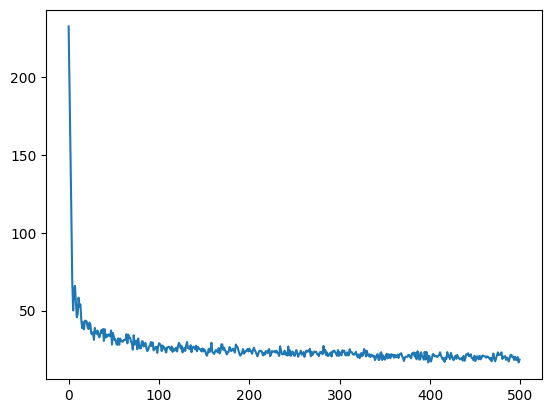

In [13]:
plt.plot(history.history['mae'] )

In [14]:
my_model.evaluate(ts_X,ts_Y)

2/2 [==============================] - 0s 4ms/step - loss: 16722.7207 - mae: 122.6746


[16722.720703125, 122.67464447021484]

In [15]:
train_pred = my_model.predict(tr_X)
test_pred = my_model.predict(ts_X)

2/2 [==============================] - 0s 3ms/step


In [16]:
tr_Score = mean_squared_error(tr_Y,train_pred)
ts_Score = mean_squared_error(ts_Y,test_pred)
print ("Train :", tr_Score)
print ("Test :", ts_Score)

Train : 4770.735929863216
Test : 16722.720458161868


In [17]:
train_pred_dat = np.empty_like(df).astype('float64')
train_pred_dat[:,]= np.nan
train_pred_dat[prev_rec:prev_rec+len(tr_X),]=train_pred.flatten()

In [18]:
test_pred_dat = np.empty_like(df).astype('float64')
test_pred_dat[:,]= np.nan
test_pred_dat[prev_rec*2+len(tr_X):,]=test_pred.flatten()

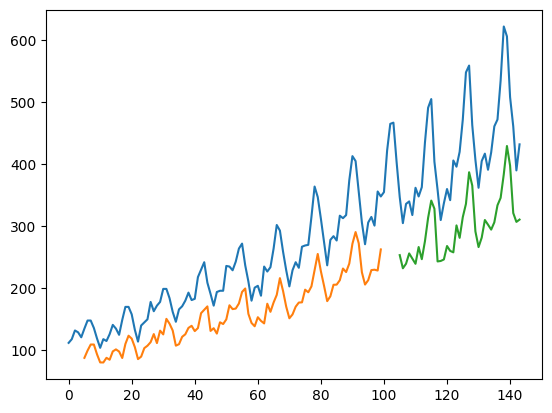

In [19]:
plt.plot(df)
plt.plot(train_pred_dat)
plt.plot(test_pred_dat)